Initiate things

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [2]:
df.info()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')

Dimensi data

In [3]:
df.shape

(87489, 8)

# Data Cleaning

Data Duplikat

In [4]:
df.duplicated().sum()

np.int64(0)

Data Null

In [5]:
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

Rename kolum biar lebih "enak dilihat"

In [7]:
df.rename(
    columns={
        'name': 'Name',
        'author': 'Author',
        'narrator': 'Narrator',
        'time': 'Time',
        'releasedate': 'Release Date',
        'language': 'Language',
        'stars': 'Stars',
        'price': 'Price',
    },
    inplace=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          87489 non-null  object
 1   Author        87489 non-null  object
 2   Narrator      87489 non-null  object
 3   Time          87489 non-null  object
 4   Release Date  87489 non-null  object
 5   Language      87489 non-null  object
 6   Stars         87489 non-null  object
 7   Price         87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


# Data Pre-processing + Feature Engineering

In [8]:
to_remove = ['Name', 'Time', 'Release Date']
df.drop(columns=to_remove, inplace=True)

**Alasan Menghapus Kolom 'Name' dan 'Time'**
* Dalam konteks analisis harga dan rating karya, nama karya tidak diperlukan karena terlalu banyak
* Durasi film juga tidak terlalu relevan dalam analisis
* Tanggal rilis juga tidak terlalu relevan
* Menghapus kolom yang tidak relevan membantu meningkatkan efisiensi komputasi

# # Cek nilai dan preprocess setiap kolom

In [9]:
df['Author'].unique()

array(['Writtenby:GeronimoStilton', 'Writtenby:RickRiordan',
       'Writtenby:JeffKinney', ..., 'Writtenby:RogerW.Thompson',
       'Writtenby:ChrisStewart', "Writtenby:StephenO'Shea"],
      shape=(48374,), dtype=object)

Karena data Author ini masih ada Writtenby: nya, kita pangkas biar lebih rapih

In [10]:
print('Issued: ', df['Author'].str.contains('Writtenby:', regex=False).sum())
df['Author'] = df['Author'].str.replace('Writtenby:', '', regex=False)

# Cek apakah Author yang masih ada "Writtenby:" nya
print('Issued (after cleaning): ', df['Author'].str.contains('Writtenby:', regex=False).sum())
df['Author'].unique()

Issued:  87489
Issued (after cleaning):  0


array(['GeronimoStilton', 'RickRiordan', 'JeffKinney', ...,
       'RogerW.Thompson', 'ChrisStewart', "StephenO'Shea"],
      shape=(48374,), dtype=object)

In [11]:
df['Narrator'].unique()

array(['Narratedby:BillLobely', 'Narratedby:RobbieDaymond',
       'Narratedby:DanRussell', ..., 'Narratedby:JeanMarsh',
       'Narratedby:McAvoyLayne', 'Narratedby:ChrisStewart'],
      shape=(29717,), dtype=object)

Karena data Narrator ini masih ada Narratedby: nya, kita pangkas biar lebih rapih

In [12]:
print('Issued: ', df['Narrator'].str.contains('Narratedby:', regex=False).sum())
df['Narrator'] = df['Narrator'].str.replace('Narratedby:', '', regex=False)

# Cek apakah Narrator yang masih ada "Narattedby:" nya
print('Issued (after cleaning): ', df['Author'].str.contains('Writtenby:', regex=False).sum())
df['Narrator'].unique()

Issued:  87489
Issued (after cleaning):  0


array(['BillLobely', 'RobbieDaymond', 'DanRussell', ..., 'JeanMarsh',
       'McAvoyLayne', 'ChrisStewart'], shape=(29717,), dtype=object)

In [13]:
df['Price']

0        468.00
1        820.00
2        410.00
3        615.00
4        820.00
          ...  
87484    596.00
87485    820.00
87486    938.00
87487    680.00
87488    569.00
Name: Price, Length: 87489, dtype: object

Jadikan 'Price' tipe numeric

In [14]:
df['Price'] = df['Price'].apply(pd.to_numeric, errors='coerce')

print(df['Price'])

0        468.0
1        820.0
2        410.0
3        615.0
4        820.0
         ...  
87484    596.0
87485    820.0
87486    938.0
87487    680.0
87488    569.0
Name: Price, Length: 87489, dtype: float64


In [15]:
df['Stars']

0           5 out of 5 stars34 ratings
1         4.5 out of 5 stars41 ratings
2         4.5 out of 5 stars38 ratings
3         4.5 out of 5 stars12 ratings
4        4.5 out of 5 stars181 ratings
                     ...              
87484                    Not rated yet
87485                    Not rated yet
87486                    Not rated yet
87487                    Not rated yet
87488                    Not rated yet
Name: Stars, Length: 87489, dtype: object

Bikin function buat bersihin kolom 'Stars', karena udah lumayan kompleks

In [16]:
def clean_stars(stars_str):
    # Jika "Not rated yet"
    if stars_str == "Not rated yet":
        return None, None
    
    # Ekstrak nilai rating (misalnya 4.5) dan jumlah rating (misalnya 34)
    try:
        rating_value = float(stars_str.split('out')[0].strip())  # Ambil angka rating
        num_ratings = int(stars_str.split('stars')[1].replace('ratings', '').strip())  # Ambil jumlah rating
        return rating_value, num_ratings
    except:
        return None, None

In [17]:
# Terapkan fungsi untuk membersihkan data
df[['Rating Value', 'Number of Ratings']] = df['Stars'].apply(lambda x: pd.Series(clean_stars(x)))

# Cek hasilnya
print(df[['Stars', 'Rating Value', 'Number of Ratings']].head())

                           Stars  Rating Value  Number of Ratings
0     5 out of 5 stars34 ratings           5.0               34.0
1   4.5 out of 5 stars41 ratings           4.5               41.0
2   4.5 out of 5 stars38 ratings           4.5               38.0
3   4.5 out of 5 stars12 ratings           4.5               12.0
4  4.5 out of 5 stars181 ratings           4.5              181.0


Menghapus kolom stars karena tidak digunakan lagi

In [18]:
df.drop(columns=['Stars'], axis=1, inplace=True)

Menghapus null pada dua kolom baru

In [19]:
df.isnull().sum()

df.dropna()

,Author,Narrator,Language,Price,Rating Value,Number of Ratings
0,GeronimoStilton,BillLobely,English,468.0,5.0,34.0
1,RickRiordan,RobbieDaymond,English,820.0,4.5,41.0
2,JeffKinney,DanRussell,English,410.0,4.5,38.0
3,RickRiordan,SoneelaNankani,English,615.0,4.5,12.0
4,RickRiordan,JesseBernstein,English,820.0,4.5,181.0
...,...,...,...,...,...,...
86991,AlaindeBotton,NicholasBell,English,820.0,3.0,4.0
86993,CarloPizzati,ManishDongardive,English,668.0,5.0,3.0
87010,TimButcher,TimButcher,English,672.0,4.0,3.0
87017,MarkTwain,GroverGardner,English,937.0,4.5,2.0


In [20]:
df.isnull().sum()

Author                   0
Narrator                 0
Language                 0
Price                 9474
Rating Value         78278
Number of Ratings    78278
dtype: int64

# Visualisasi Data

Visualisasi data dilakukan sebelum data preprocessing + feature engineering

In [21]:
num_cols = ['Price', 'Rating Value', 'Number of Ratings']

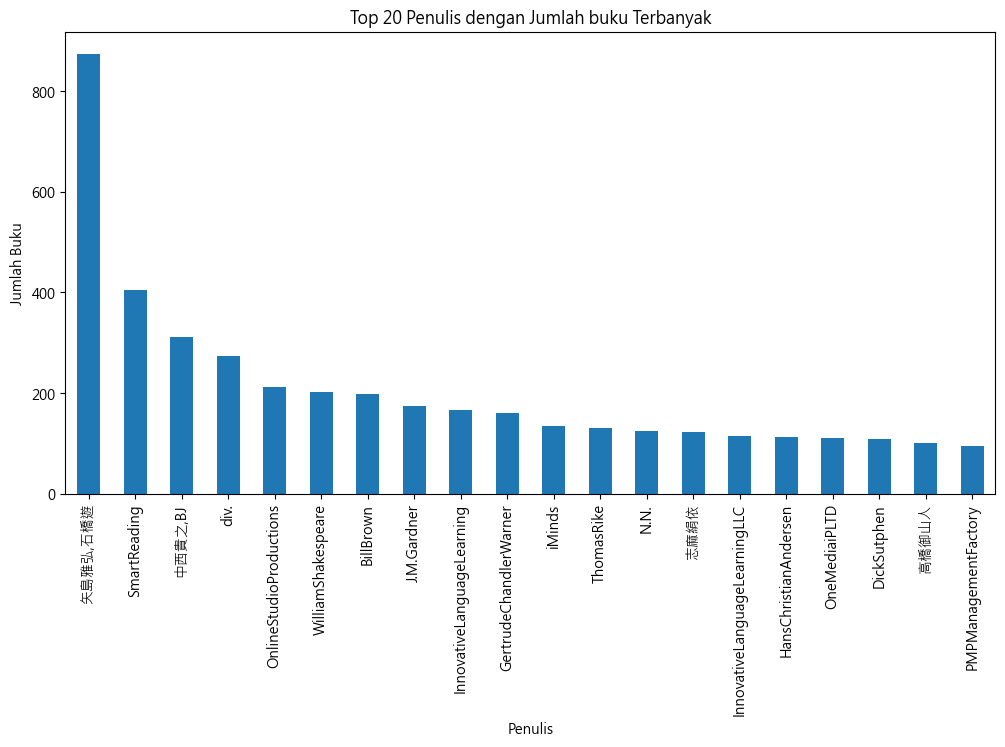

In [22]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

df['Author'].value_counts().nlargest(20).plot(kind='bar', figsize=(12, 6))

plt.title('Top 20 Penulis dengan Jumlah buku Terbanyak')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=90)

plt.show()

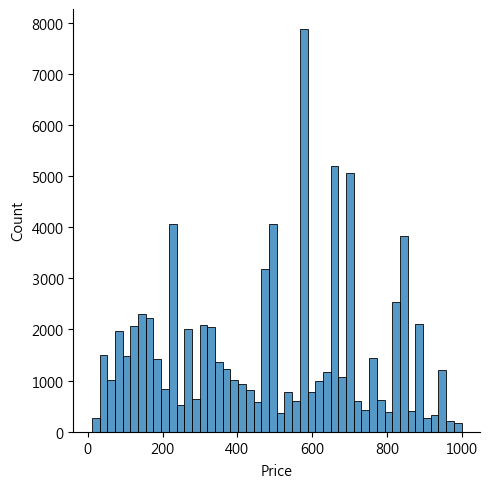

In [23]:
sns.displot(df['Price'])

<Axes: xlabel='Rating Value'>

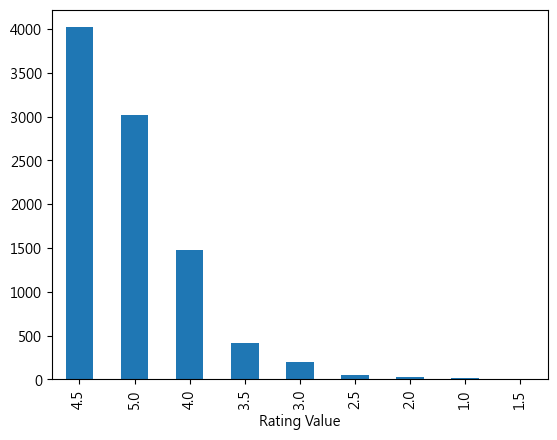

In [24]:
df['Rating Value'].value_counts().plot(kind='bar')